In [1]:
import cv2 as cv
import numpy as np
%matplotlib inline

In [2]:
img = cv.imread('./data/boards/circular/lkQsT.jpg', 0)
img = cv.medianBlur(img,5)

In [3]:
from matplotlib import pyplot as plt

In [4]:
ret,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,
            cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,
            cv.THRESH_BINARY,5,2)

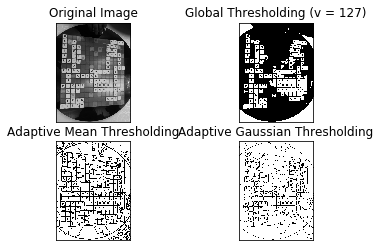

In [5]:
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
# plt.figure(figsize=(18, 16), dpi=80)
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
# plt.show()

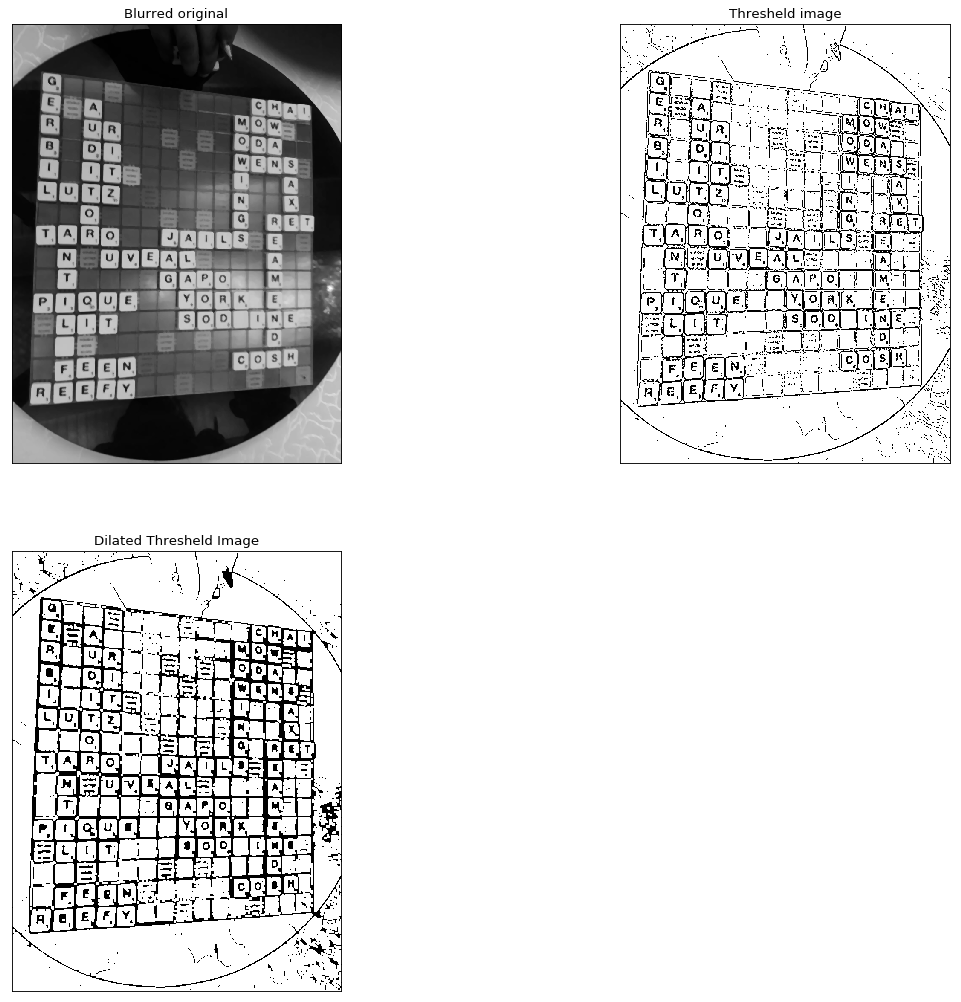

In [6]:
kernel = np.ones((5,5),np.uint8)

# Erode:
# opening = cv.erode(th3, kernel) 
opening = cv.morphologyEx(th3, cv.MORPH_OPEN, kernel)

plt.figure(figsize=(18, 16), dpi=80)
plt.subplot(221), plt.imshow(img, cmap='gray')
plt.title('Blurred original'), plt.xticks([]), plt.yticks([])

plt.subplot(222), plt.imshow(th3, cmap='gray')
plt.title('Thresheld image'), plt.xticks([]), plt.yticks([])

plt.subplot(223), plt.imshow(opening, cmap = 'gray')
plt.title('Dilated Thresheld Image'), plt.xticks([]), plt.yticks([])

plt.show()

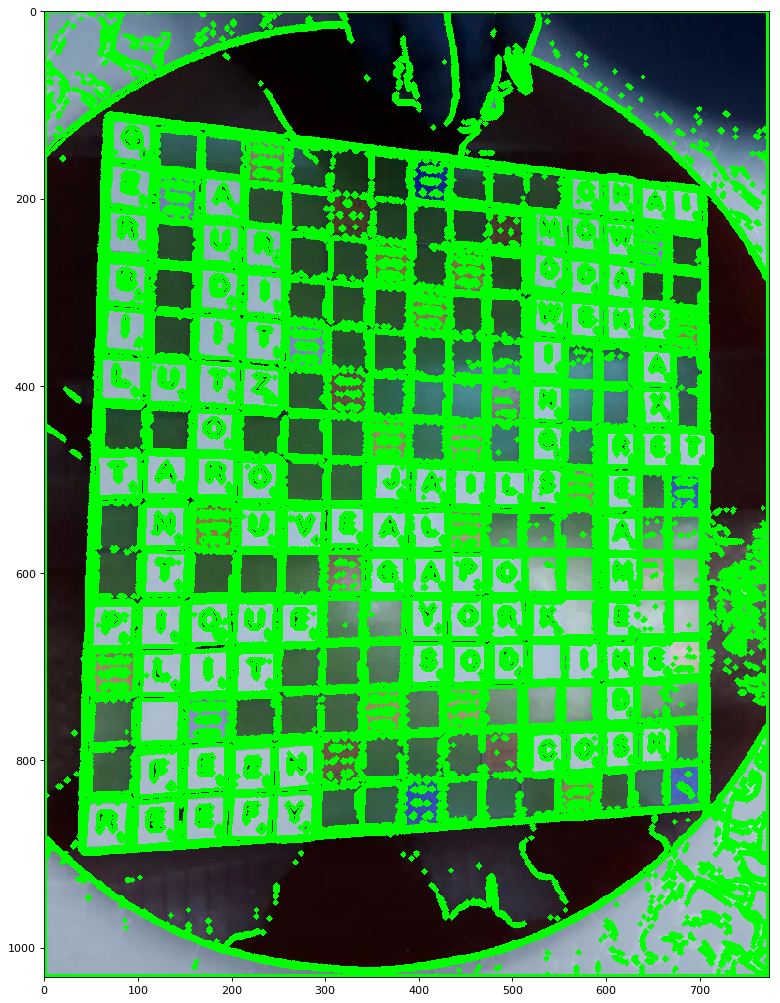

In [7]:
im2, contours, hierarchy = cv.findContours(th3, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
img = cv.imread('./data/boards/circular/lkQsT.jpg')
cv.drawContours(img, contours, -1, (0,255,0), 3)
plt.figure(figsize=(18, 16), dpi=80)
plt.imshow(img)